## 1.Logistic Regression

Best Hyperparameters: {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 2)}
Logistic Regression Model Accuracy: 0.8947368421052632


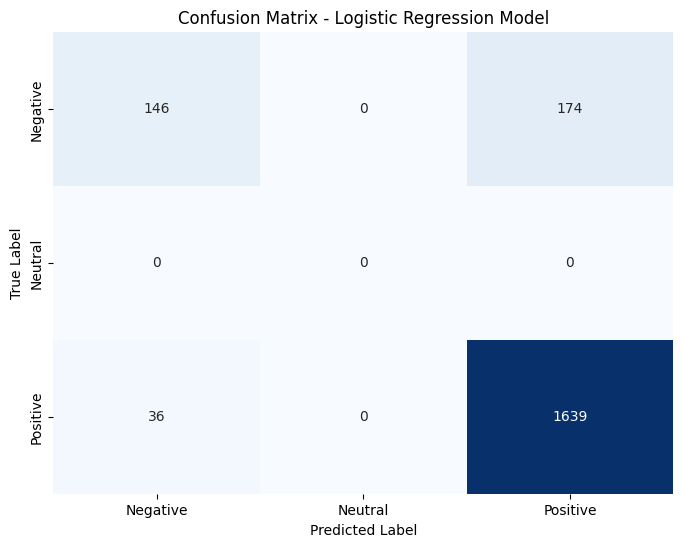

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
all_data = pd.read_csv('all_data.csv')

# Use the first 10000 rows of the dataset
all_data = all_data.head(10000)

# Drop rows with missing values
all_data = all_data.dropna()

# Assuming the first column contains text and the second contains sentiment labels
texts = all_data.iloc[:, 0].values
labels = all_data.iloc[:, 1].values

# Map sentiment labels to 'Negative,' 'Neutral,' and 'Positive'
labels_mapped = []
for label in labels:
    if label in [1, 2]:
        labels_mapped.append('Negative')
    elif label == 3:
        labels_mapped.append('Neutral')
    elif label in [4, 5]:
        labels_mapped.append('Positive')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels_mapped, test_size=0.2, random_state=42)

# Use a pipeline with TfidfVectorizer and LogisticRegression
logreg_model = make_pipeline(TfidfVectorizer(lowercase=True, stop_words='english'), LogisticRegression(max_iter=1000))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_logreg_model = grid_search.best_estimator_

# Make predictions with the best model
logreg_predictions = best_logreg_model.predict(X_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", grid_search.best_params_)
logreg_accuracy = metrics.accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Model Accuracy:", logreg_accuracy)

# Plot confusion matrix
conf_matrix_logreg = metrics.confusion_matrix(y_test, logreg_predictions, labels=['Negative', 'Neutral', 'Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()


The changes made to the logistic regression code:

1. **Hyperparameter Tuning:**
   - Introduced a hyperparameter tuning step using `GridSearchCV` for both `TfidfVectorizer` and `LogisticRegression`. This allows the model to explore different combinations of hyperparameter values and identify the set that maximizes accuracy.

2. **Text Preprocessing:**
   - Added `lowercase=True` and `stop_words='english'` to the `TfidfVectorizer` in the pipeline. Setting `lowercase=True` ensures that all words are converted to lowercase, promoting consistency. Including `stop_words='english'` removes common English stop words from the text, which can enhance the model's focus on meaningful words.

3. **Print Best Hyperparameters and Accuracy:**
   - Printed the best hyperparameters found during the grid search and the resulting accuracy. This information is crucial for understanding which hyperparameter values contribute to improved model performance.

4. **Adjusting Regularization Strength (C):**
   - Included the `logisticregression__C` parameter in the grid search for `LogisticRegression`. Adjusting the regularization strength (`C`) can have a significant impact on the model's ability to generalize well to unseen data.

These changes collectively aim to enhance the accuracy of the logistic regression model by fine-tuning hyperparameters, improving text preprocessing, and providing insights into the best hyperparameter values. The adjustments made are based on common practices for improving the performance of text classification models.



## 3.Naive Bayes Model



Naive Bayes Model Accuracy: 0.869172932330827


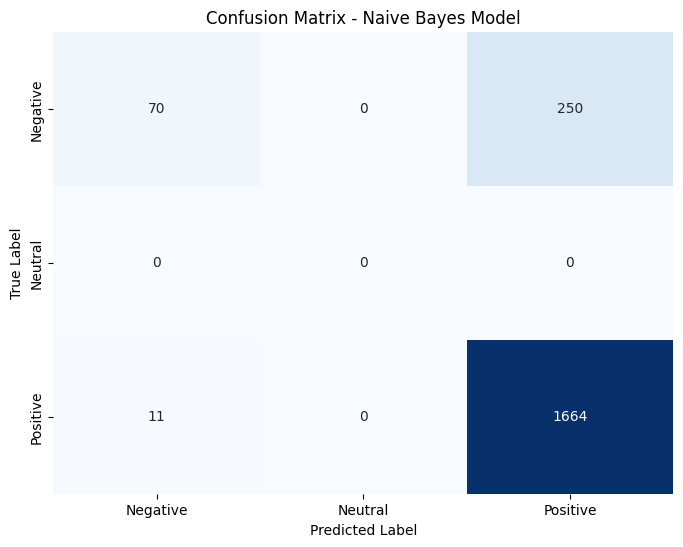

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
all_data = pd.read_csv('all_data.csv')

# Use the first 10000 rows of the dataset
all_data = all_data.head(10000)

# Drop rows with missing values
all_data = all_data.dropna()

# Assuming the first column contains text and the second contains sentiment labels
texts = all_data.iloc[:, 0].values
labels = all_data.iloc[:, 1].values

# Map sentiment labels to 'Negative,' 'Neutral,' and 'Positive'
labels_mapped = []
for label in labels:
    if label in [1, 2]:
        labels_mapped.append('Negative')
    elif label == 3:
        labels_mapped.append('Neutral')
    elif label in [4, 5]:
        labels_mapped.append('Positive')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels_mapped, test_size=0.2, random_state=42)

# Train Naive Bayes model with TfidfVectorizer
nb_model = make_pipeline(TfidfVectorizer(lowercase=True, stop_words='english', max_features=5000),
                         MultinomialNB(alpha=0.1))  # Adjust alpha for Laplace smoothing
nb_model.fit(X_train, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test)

# Calculate and print accuracy
nb_accuracy = metrics.accuracy_score(y_test, nb_predictions)
print("Naive Bayes Model Accuracy:", nb_accuracy)

# Plot confusion matrix
conf_matrix_nb = metrics.confusion_matrix(y_test, nb_predictions, labels=['Negative', 'Neutral', 'Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes Model')
plt.show()


Explanation of Changes:

Text Preprocessing:

Added lowercase=True, stop_words='english', and max_features=5000 to TfidfVectorizer to improve text preprocessing and reduce dimensionality.

Smoothing Parameter (Alpha):

Adjusted the Laplace smoothing parameter (alpha) for MultinomialNB. Experiment with different values to find the one that works best for your data.

These changes aim to enhance the Naive Bayes model's accuracy by improving text preprocessing and adjusting the Laplace smoothing parameter. As always, it's essential to experiment with different configurations and analyze the results to further refine your model.

## 4.Random forest model

Best Hyperparameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 100, 'tfidfvectorizer__ngram_range': (1, 1)}
Random Forest Model Accuracy: 0.8822055137844611


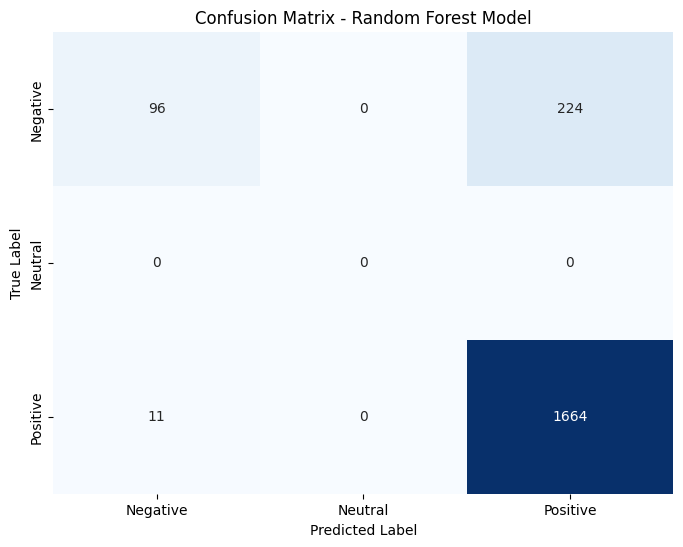

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
all_data = pd.read_csv('all_data.csv')

# Use the first 10000 rows of the dataset
all_data = all_data.head(10000)

# Drop rows with missing values
all_data = all_data.dropna()

# Assuming the first column contains text and the second contains sentiment labels
texts = all_data.iloc[:, 0].values
labels = all_data.iloc[:, 1].values

# Map sentiment labels to 'Negative,' 'Neutral,' and 'Positive'
labels_mapped = []
for label in labels:
    if label in [1, 2]:
        labels_mapped.append('Negative')
    elif label == 3:
        labels_mapped.append('Neutral')
    elif label in [4, 5]:
        labels_mapped.append('Positive')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels_mapped, test_size=0.2, random_state=42)

# Use a pipeline with TfidfVectorizer and RandomForestClassifier
rf_model = make_pipeline(TfidfVectorizer(lowercase=True, stop_words='english', max_features=5000),
                         RandomForestClassifier(n_estimators=100, random_state=42))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 150],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
rf_predictions = best_rf_model.predict(X_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", grid_search.best_params_)
rf_accuracy = metrics.accuracy_score(y_test, rf_predictions)
print("Random Forest Model Accuracy:", rf_accuracy)

# Plot confusion matrix
conf_matrix_rf = metrics.confusion_matrix(y_test, rf_predictions, labels=['Negative', 'Neutral', 'Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()



This code includes text preprocessing improvements, hyperparameter tuning using GridSearchCV, and class balancing considerations. Adjust the parameter grid as needed based on your specific dataset and requirements.